In [10]:
from __future__ import print_function

import pandas as pd
import nltk
import matplotlib.pyplot as plt
import json
import csv
from datetime import datetime

#import requests
from pandas import DataFrame
from elasticsearch import Elasticsearch
from time import sleep
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
import re
from lxml import etree
import collections
from xml.etree import ElementTree
import xml.etree.ElementTree
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics.pairwise import manhattan_distances

import numpy as np
from sklearn.manifold import TSNE
import os
import codecs
# import mpld3
import pylab
import matplotlib
import collections
import matplotlib.collections
from matplotlib.collections import PatchCollection
from matplotlib.mlab import PCA
from nltk.stem.snowball import SnowballStemmer

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
import IPython


from sklearn.manifold import MDS

import pylab as pl
import csv

In [12]:
####CTGOV MESH TERMS LIST FROM FILE##########
ct_gov_mesh_list1 = []
ct_gov_mesh_list_id = []
with open("/Users/Evan.Chang1@ibm.com/Desktop/evan_outputs_no_thresh.csv", 'rt') as outfile:
    reader = csv.reader(outfile, delimiter='\t')
    for row in reader:
        new_row =row[0].split(',')
        ct_gov_mesh_list1.append(new_row[1:])
        ct_gov_mesh_list_id.append(new_row[0])

In [13]:
# ct_gov_mesh_list_id, ct_gov_mesh_list1

In [14]:
################## Parsing of XML finding General topics and all MeSH terms ########################################
root = xml.etree.ElementTree.parse("MESH.xml").getroot() 

#The XML is too big to upload on Github 

String_list = []

#Anatomy [A]
#Organims [B]
#Diseases[C]
#Chemical and Drugs[D]
#Analytical, Diagnostic and Therapeutic Techniques, and Equipment[E]
#Psychiatry and Psychology[F]
#Phenomena and Process[G]
#Disciplines and Occupations[H]
#Anthropology, Education, Sociology, and Social Phenomena [I]
#Technology, Industry, and Agriculture[J]
#Humanities[K]
#Information Science[L]
#Named Groups[M]
#Health Care[N]
#Publication Characteristics[V]
#Geographicals[Z]

#172,620 Tree Number -> 86,310
#56,940 Tree Number List -> 28,470
tree_high = []

for child in root:
    test_hold = []
    for element in child.findall("TreeNumberList"):
        tree = element.find("TreeNumber").text
        test_hold.append(tree)
    tree_high.append(test_hold)

    
#Need to find <ConceptName>
#108,846 -> 54,423
for child in root:
     for element in child:
         for stringz in element:
             if stringz.tag == "String": 
                 String_list.append(stringz.text)


In [15]:
MeSH_letters = []
for i in tree_high:
    for j in i:
        MeSH_letters.append(j[0])


In [16]:
len(MeSH_letters),len(String_list), len(tree_high)


(28470, 28472, 28472)

In [17]:
finals_list= []
for i in range(len(MeSH_letters)):
    holder = [MeSH_letters[i],String_list[i]]
    finals_list.append(holder)
    
    

In [18]:
#Anatomy [A]
#Organims [B]
#Diseases[C]
#Chemical and Drugs[D]
#Analytical, Diagnostic and Therapeutic Techniques, and Equipment[E]
#Psychiatry and Psychology[F]
#Phenomena and Process[G]
#Disciplines and Occupations[H]
#Anthropology, Education, Sociology, and Social Phenomena [I]
#Technology, Industry, and Agriculture[J]
#Humanities[K]
#Information Science[L]
#Named Groups[M]
#Health Care[N]
#Publication Characteristics[V]
#Geographicals[Z]

for i in range(len(finals_list)):
#     for j in finals_list[i]:
    if finals_list[i][0] == "A":
        finals_list[i][0] = "Anatomy"
            
    elif finals_list[i][0] == "B":
        finals_list[i][0] = "Organisms"
            
    elif finals_list[i][0] == "C":
        finals_list[i][0] = "Diseases"
            
    elif finals_list[i][0] == "D":
#             print("pong")
        finals_list[i][0] = "Chemical"
            
    elif finals_list[i][0] == "E":
        finals_list[i][0] = "Analytical"

    elif finals_list[i][0] == "F":
        finals_list[i][0] =  "Psychiatry"
            
    elif finals_list[i][0] == "G":
        finals_list[i][0] =  "Phenomena"
            
    elif finals_list[i][0] == "H":
        finals_list[i][0] = "Disciplines"
            
    elif finals_list[i][0] == "I":
        finals_list[i][0] =  "Anthropology"
            
    elif finals_list[i][0] == "J":
        finals_list[i][0] = "Technology"
            
    elif finals_list[i][0] == "K":
        finals_list[i][0] =  "Humanities"
            
    elif finals_list[i][0] == "L":
        finals_list[i][0] = "Information"
            
    elif finals_list[i][0] == "M":
        finals_list[i][0] = "Named Groups"
            
    elif finals_list[i][0] == "N":
        finals_list[i][0] = "Health Care"
            
    elif finals_list[i][0] == "V":
        finals_list[i][0] = "Publication"
        
    else:
        finals_list[i][0] = "Geographicals" 
#         print(j[0])

In [20]:
#********** OUTPUT_TABLE IS THE PANDAS TABLE OF TEXT AND AUTHORS ********************

wordList_dict = dict(zip(ct_gov_mesh_list_id, ct_gov_mesh_list1))

print(len(wordList_dict))
#This has the id: Terms in a dictionary

print("wordlist finalized")
# print(wordList_dict)

299
wordlist finalized


In [21]:
stemmer = SnowballStemmer("english")

totalvocab_stemmed = []
totalvocab_tokenized = []

#Word List is a dict

wordList= []
for k,v in wordList_dict.items():
        wordList.append(v)
        




In [22]:
# finals_list #This is the list of MeSH mapped to general categories

# wordList

for i in range(len(wordList)):
    for j in range(len(wordList[i])):
        for k in range(len(finals_list)):
            if wordList[i][j] == str(" ") + finals_list[k][1]:
                wordList[i][j] = finals_list[k][0]
            elif wordList[i][j] == finals_list[k][1]:
                wordList[i][j] = finals_list[k][0]
            else:
                continue

In [38]:
wordList_final = []
for i in range(len(wordList)):
    wordList_holder = []
    for j in range(len(wordList[i])):
        if wordList[i][j] != '':
            wordList_holder.append(wordList[i][j])
    wordList_final.append(wordList_holder)

In [39]:
wordList_final[0:20][0]

['Analytical',
 ' Clinical Research Protocol',
 'Analytical',
 ' Protocols',
 'Health Care',
 'Anthropology',
 'Chemical',
 'Psychiatry',
 ' Drug Approval Process',
 'Diseases',
 'Chemical']

In [40]:
import collections
def sorted_by_count(lists):
  counts = collections.defaultdict(int)
  for L in lists:
#     for n in L:
    counts[L] += 1
  return [num for num, count in
          sorted(counts.items(),
                 key=lambda k_v: (k_v[1], k_v[0]),
                 reverse=True)]

wordList_finalized = []
for i in wordList_final:
    holder2 = sorted_by_count(i)
    wordList_finalized.append(holder2[0:2])
    
# wordList_final_sort = sorted_by_count(wordList_final)
for i in range(len(wordList_finalized)):
    wordList_finalized[i] = sorted(wordList_finalized[i])

In [41]:
final_final = []
for i in range(len(wordList_finalized)):
    final_final.append(','.join(wordList_finalized[i]))

In [42]:
from collections import defaultdict

final_dict = defaultdict(int)
for word in final_final:
    final_dict[word] += 1

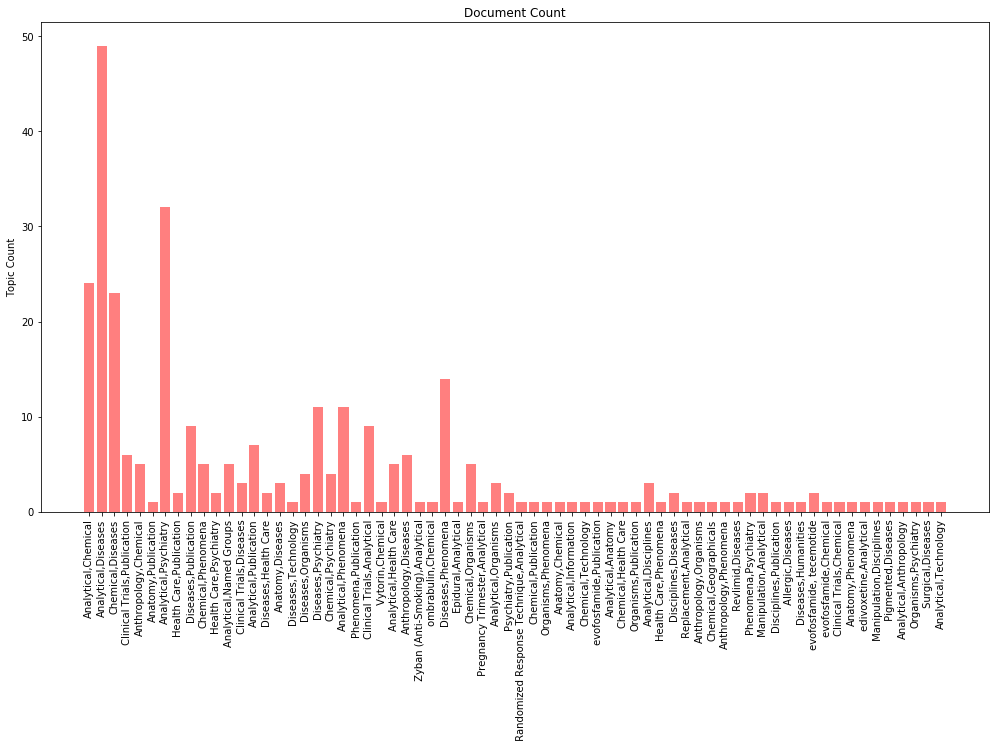

In [43]:
##################### HISTOGRAM OF DOCUMENT COUNTS AND TOPICS#########################
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize =(17,9))

histo_x = list(final_dict.keys())
histo_y = list(final_dict.values())

x_holder= []
labels = []

y_pos = np.arange(len(histo_x))

for i in histo_x:
        labels.append(i)

for i in range(len(histo_x)):
        x_holder.append(i)

plt.bar(y_pos, histo_y, align='center', alpha=0.5, color='r')

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(y_pos, histo_x, rotation=90)
plt.ylabel('Topic Count')
plt.title('Document Count')
# plt.autoscale(enable=True, axis='x', tight=False)
# plt.tight_layout()
plt.show()